# Chapter 5.6.3 Softmax-with-Loss

- 출력층에서 사용
- 입력 값 정규화하여 출력 -> score를 합이 1이 되는 확률로 변환
- 신경망을 학습할 때 필요
    - 추론(답을 내는 과정): 가장 높은 점수만 알면 되므로 필요 없음

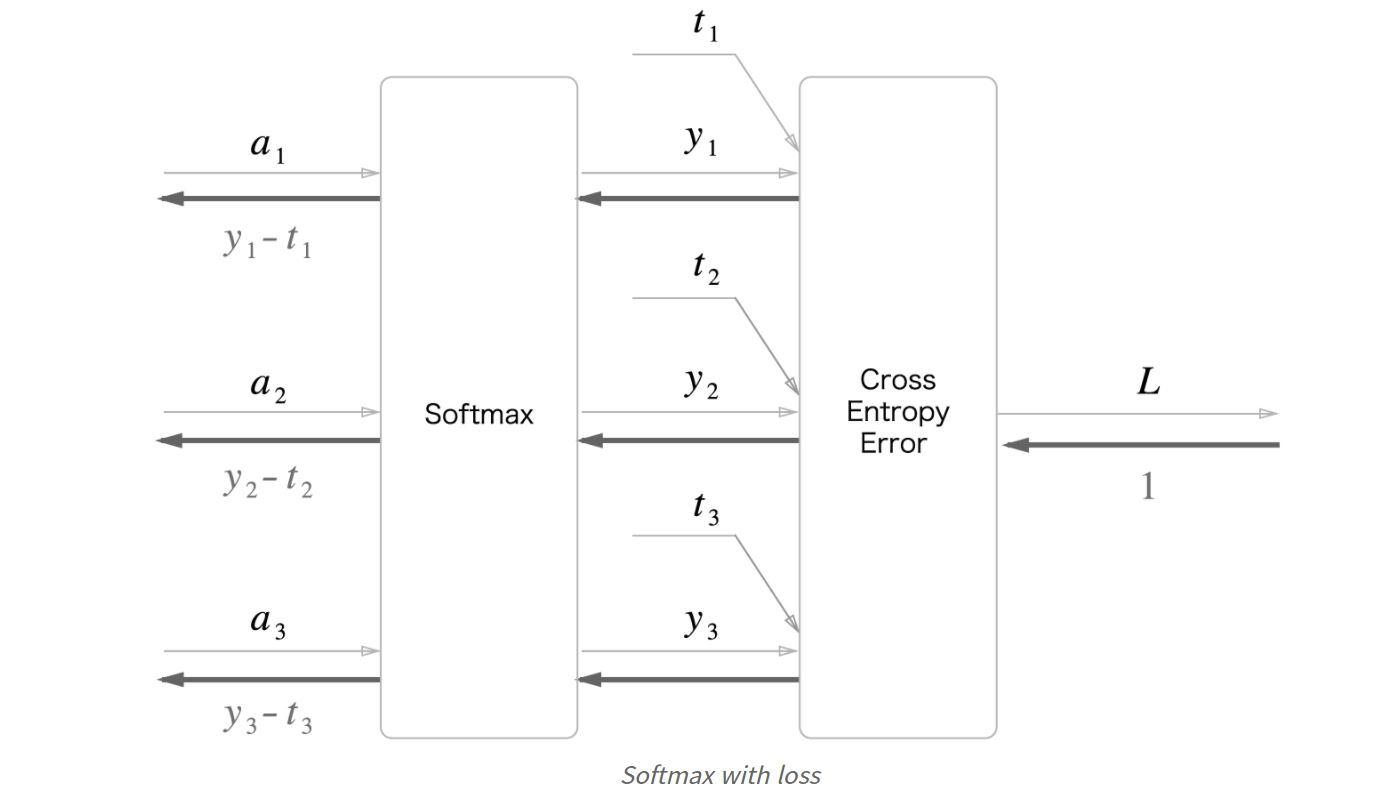

- loss function인 cross entropy error도 고려

- *softmax layer*: input (a1, a2, a3) output (y1, y2, y3)

- *cross entropy error layer*: input (t1, t2, t3) output loss $L$

- 신경망 학습의 목적: **output of softmax가 정답 레이블과 가까워지도록 W 매개변수 value 조절**

### result value of backpropagation

- backpropagaion of *softmax layer*: output (y1-t, y2-t2, y3-t3)
    - : output - input
    - backpropagation of neural network: **오차 -> 앞 계층에 전해짐**
        - 신경망 학습의 중요한 성질
        - 전달된 오차가 작으면 학습하는 정도도 작아짐

## Code Softmax-with-Loss Layer

In [2]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # loss
        self.y = None # output of softmax
        self.t = None # answer label (one-hot vector)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y-self.t) / batch_size
        
        return dx